In [1054]:
import numpy as np
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import os
from sklearn import linear_model
import matplotlib.pyplot as plt

In [624]:
sensing_list=[]
for name in os.listdir("./StudentLife_Dataset/Inputs/sensing/"):
    if name.startswith('.'):
        continue
    sensing_list.append(name)

In [625]:
inputs = {}
num_quite={}
for name in sensing_list:
    
    li = []
    p=[]
    for j in range(60):
        if name == 'bluetooth':
            files = './StudentLife_Dataset/Inputs/sensing/' + name + '/' + 'bt' + '_u' + str(f"{j:02d}") + '.csv'
        else:
            files = './StudentLife_Dataset/Inputs/sensing/' + name + '/' + name + '_u' + str(f"{j:02d}") + '.csv'
        if  os.path.exists(files):
            li.append(pd.read_csv(files))
        else:
            li.append(None)
            p.append(j)
    inputs[name] = li
    num_quite[name] = p


In [870]:
flourishing = pd.read_csv('./StudentLife_Dataset/Outputs/FlourishingScale.csv')
panas = pd.read_csv('./StudentLife_Dataset/Outputs/panas.csv')
positive_score=['Interested', 'Strong', 'Enthusiatic', 'Proud', 'Alert', 'Inspired', 'Determined', 'Attentive', 'Active']

panas_prescores = []
panas_postscores = []
flour_prescores = []
flour_postscores = []
for i in range(60):   
    panas_prescores.append(panas.loc[panas['uid'] == 'u' + str(f"{i:02d}")].loc[panas['type'] == 'pre'])
    panas_postscores.append(panas.loc[panas['uid'] == 'u' + str(f"{i:02d}")].loc[panas['type'] == 'post'])
    flour_prescores.append(flourishing.loc[flourishing['uid'] == 'u' + str(f"{i:02d}")].loc[flourishing['type'] == 'pre'])
    flour_postscores.append(flourishing.loc[flourishing['uid'] == 'u' + str(f"{i:02d}")].loc[flourishing['type'] == 'post'])
#     panas_prescores[i] = panas_prescores[i].drop(columns="uid")
    panas_prescores[i] = panas_prescores[i].drop(columns="type")
#     panas_postscores[i] = panas_postscores[i].drop(columns="uid")
    panas_postscores[i] = panas_postscores[i].drop(columns="type")
    
#     flour_prescores[i] = flour_prescores[i].drop(columns="uid")
#     flour_prescores[i] = flour_prescores[i].drop(columns="type")
#     flour_postscores[i] = flour_postscores[i].drop(columns="uid")
#     flour_postscores[i] = flour_postscores[i].drop(columns="type")

In [1115]:
# frequency of phone lock more than 1 hour
df_lock = pd.DataFrame(columns = ['freq'])
for i in range(60):
    if inputs['phonelock'][i] is not None:
        df_lock.loc[i] = [len(inputs['phonelock'][i])]
        key = 'u'+str(f"{i:02d}") 
        df_lock.rename(index={i:key}, inplace=True)

# conversation time unit in timestamp
df_conversation = pd.DataFrame(columns=['time'])
for i in range(60):
    if inputs['conversation'][i] is not None:
        key = 'u' + str(f"{i:02d}")
        df_conversation.loc[i] = np.sum(inputs['conversation'][i].iloc[:,1] - inputs['conversation'][i].iloc[:,0])
        df_conversation.rename(index={i:key}, inplace=True)

# the number of activity recorded for each person is not the same. if we want to use activity as our feature,
# maybe better to use as percentage
df_run = pd.DataFrame(columns=['percentage'])
for i in range(60):
    if inputs['activity'][i] is not None:
        res = np.unique(inputs['activity'][i].iloc[:, 1], return_counts=True)
        running = 2
        df_run.loc['u'+str(f"{i:02d}")] = res[1][running]/sum(res[1])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sh

2
accuracy: 0.5
2
accuracy: 0.9


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sh

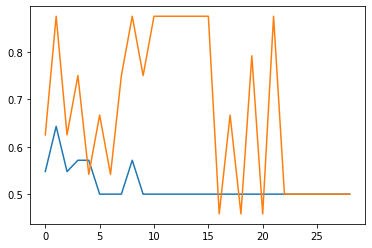

In [1116]:
def roc_auc_comparison(features, y):
    X_train, X_test, y_train, y_test = train_test_split(features, y, random_state=42)
    scores = []
    for i in range(1,30):
        neighbour = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
        pred = neighbour.predict(X_test)
        scores.append(roc_auc_score(y_test, pred))
    n_neighbour = np.asarray(scores).argmax()+1
    print(n_neighbour)
    plt.plot(scores)
    return n_neighbour

### KNN ###
### Binary ###
def KNN(features, y, n_neighbour):
    X_train, X_test, y_train, y_test = train_test_split(features, y, random_state=42)
    neighbour = KNeighborsClassifier(n_neighbors=n_neighbour).fit(X_train, y_train)
    pred = neighbour.predict(X_test)
    print('accuracy:',  accuracy_score(y_test, pred))

df_pos_post = pd.DataFrame(columns = ['post'])
df_neg_post = pd.DataFrame(columns = ['post'])
itr = 0
for person in panas_postscores:
    positive = 0
    negative = 0
    if person.empty:
        continue
    person = person.fillna(0)
    
    for col in person:
        if col in 'uid':
            continue
        score = person.loc[:, col].iloc[0]
        if col in positive_score:
            positive += score
        else:
            negative += score
    key = person.loc[:, 'uid'].iloc[0]
    df_pos_post.loc[itr] = positive
    df_pos_post.rename(index={itr:key}, inplace=True)
    df_neg_post.loc[itr] = negative
    df_neg_post.rename(index={itr:key}, inplace=True)
    itr +=1
    
df_pos_pre = pd.DataFrame(columns = ['pre'])
df_neg_pre = pd.DataFrame(columns = ['pre'])
itr = 0
for person in panas_prescores:
    positive = 0
    negative = 0
    if person.empty:
        continue
    person = person.fillna(0)
    
    for col in person:
        if col in 'uid':
            continue
        score = person.loc[:, col].iloc[0]
        if col in positive_score:
            positive += score
        else:
            negative += score
    df_pos_pre.loc[itr] = positive
    key = person.loc[:, 'uid'].iloc[0]
    df_pos_pre.rename(index={itr:key}, inplace=True)
    df_neg_pre.loc[itr] = negative
    df_neg_pre.rename(index={itr:key}, inplace=True)
    itr +=1

new_df_lock = pd.DataFrame(columns = ['freq'])
new_df_conversation = pd.DataFrame(columns = ['time'])
new_df_run = pd.DataFrame(columns = ['percentage'])
for uid in df_neg_post.index:
    new_df_lock.loc[uid] = df_lock.loc[uid]
    new_df_conversation.loc[uid] = df_conversation.loc[uid]
    new_df_run.loc[uid] = df_run.loc[uid]

m = df_neg_post.iloc[:, 0].mean()
df_neg_post[df_neg_post.iloc[:, 0] <= m] = 0
df_neg_post[df_neg_post.iloc[:, 0] > m] = 1

m = df_pos_post.iloc[:, 0].mean()
df_pos_post[df_pos_post.iloc[:, 0] <= m] = 0
df_pos_post[df_pos_post.iloc[:, 0] > m] = 1

X = pd.concat([new_df_lock, new_df_conversation, new_df_run], axis = 1)

n_neighbour = roc_auc_comparison(X, df_neg_post)

KNN(X, df_neg_post, n_neighbour)


n_neighbour = roc_auc_comparison(X, df_pos_post)

KNN(X, df_pos_post, n_neighbour)



In [984]:
# # panas data
# panas_header = panas_prescores[0].columns
# df_panas = pd.DataFrame(columns=panas_header)
# for i in range(60):
#     key = 'u'+str(f"{i:02d}")
#     if len(panas_prescores[i].to_numpy()) != 0 and len(panas_postscores[i] != 0):
#         df_panas.loc[i] = (panas_postscores[i].to_numpy()-panas_prescores[i].to_numpy())[0]
#     df_panas.rename(index={i:key}, inplace=True)
# #df_panas

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [985]:
# threshold_panas = {}
# for col in panas_header:
#     threshold_panas[col] = np.nanmean(df_panas[[col]].to_numpy())

AttributeError: 'int' object has no attribute 'dtype'

In [866]:
# for index, row in df_panas.iterrows():
#     for col in panas_header:
#         if row[col] <= threshold_panas[col]:
#             row[col] = 0
#         else:
#             row[col] = 1
# df_panas

,uid,type,Interested,Distressed,Upset,Strong,Guilty,Scared,Hostile,Enthusiastic,Proud,Irritable,Alert,Inspired,Nervous,Determined,Attentive,Jittery,Active,Afraid


In [867]:
# # flourishing data 
# flour_header = flour_prescores[0].columns
# df_flour = pd.DataFrame(columns=flour_header)
# for i in range(60):
#     key = 'u'+str(f"{i:02d}")
#     if len(flour_prescores[i].to_numpy()) != 0 and len(flour_postscores[i] != 0):
#         df_flour.loc[i] = (flour_postscores[i].to_numpy()-flour_prescores[i].to_numpy())[0]
#     df_flour.rename(index={i:key}, inplace=True)
# #df_flour

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [631]:
# threshold_flour = {}
# for col in flour_header:
#     threshold_flour[col] = np.nanmean(df_flour[[col]].to_numpy())

In [632]:
# for index, row in df_flour.iterrows():
#     for col in flour_header:
#         if row[col] <= threshold_flour[col]:
#             row[col] = 0
#         else:
#             row[col] = 1
# #df_flour

In [806]:
# features = []
# for key in inputs:
#     features.append(key)
# # features

In [795]:
# # NAN to 0
# df_panas_new = df_panas.fillna(0)
# X_train = pd.concat([new_df_conversation, new_df_lock], axis=1)[0:25]
# Y_train = df_panas_new.iloc[0:25]
# X_test = pd.concat([new_df_conversation, new_df_lock], axis=1)[25:]
# Y_test = df_panas_new.iloc[25:]
# X_train, X_test, y_train, y_test = train_test_split(pd.concat([new_df_conversation, new_df_lock], axis=1), df_panas_new, random_state=42)
# def calculateAUC(matrix_X, matrix_Y):
#     auc = np.zeros(30)
#     for k in range(1, 31):
#         knn = KNeighborsClassifier(n_neighbors=k)
#         knn.fit(X_train, y_train)
#         predictY = knn.predict(matrix_X)
#         print(predictY)
#         print(matrix_Y.to_numpy())
#         auc[k-1] = roc_auc_score(matrix_Y.to_numpy(), predictY)
#     return auc

# #calculateAUC(X_test, Y_test)
# np.asmatrix(Y_test.to_numpy())
# X_train.to_numpy()
# neighbour = KNeighborsClassifier(n_neighbors=9)

# neighbour.fit(X_train, y_train)
# pred = neighbour.predict(X_test)
# y_np = Y_test.to_numpy()
# for i in range(len(pred)):
#     print(accuracy_score(pred[i], y_np[i]))

0.8333333333333334
0.6111111111111112
0.6666666666666666
0.7777777777777778
0.7777777777777778
0.7777777777777778
0.7777777777777778
0.6666666666666666
0.7222222222222222
0.8333333333333334


In [741]:
len(Y_test.to_numpy())

13

In [800]:
# # time
# now = datetime.now()
# then = datetime.fromtimestamp(os.path.getmtime("x.cache"))
# tdelta = now - then
# seconds = tdelta.total_seconds()

In [801]:
# weather_encoded = [1, 1]
# temp_encoded = [0,0]
# list(zip(weather_encoded,temp_encoded))
#new_df_conversation.to_numpy()[:]

In [802]:
#pd.concat([new_df_conversation, new_df_lock], axis=1)